In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# and will use scikit-learn

In [2]:
water = pd.read_csv('water_potability.csv')
water = water.sample(frac=1, random_state=0).reset_index(drop=True)
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.544709,181.413402,31429.379029,7.555030,350.397082,393.889616,10.247232,82.721912,2.318152,1
1,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
2,7.264069,216.622392,19412.112723,6.932458,NaN,301.953551,19.210991,67.712585,3.960282,1
3,5.150457,186.560846,18655.541892,7.024307,NaN,379.537937,17.604066,58.831969,4.147029,0
4,5.331940,194.874065,16658.876503,7.993830,316.675162,335.120398,10.180514,59.572714,4.434820,0


<h2>Exploratory Data Analysis</h2>

In [3]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


3276 samples and 9 features. Features are on very different scales.

I will handle missing values while creating pipelines

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278AA960B20>,
      dtype=object)

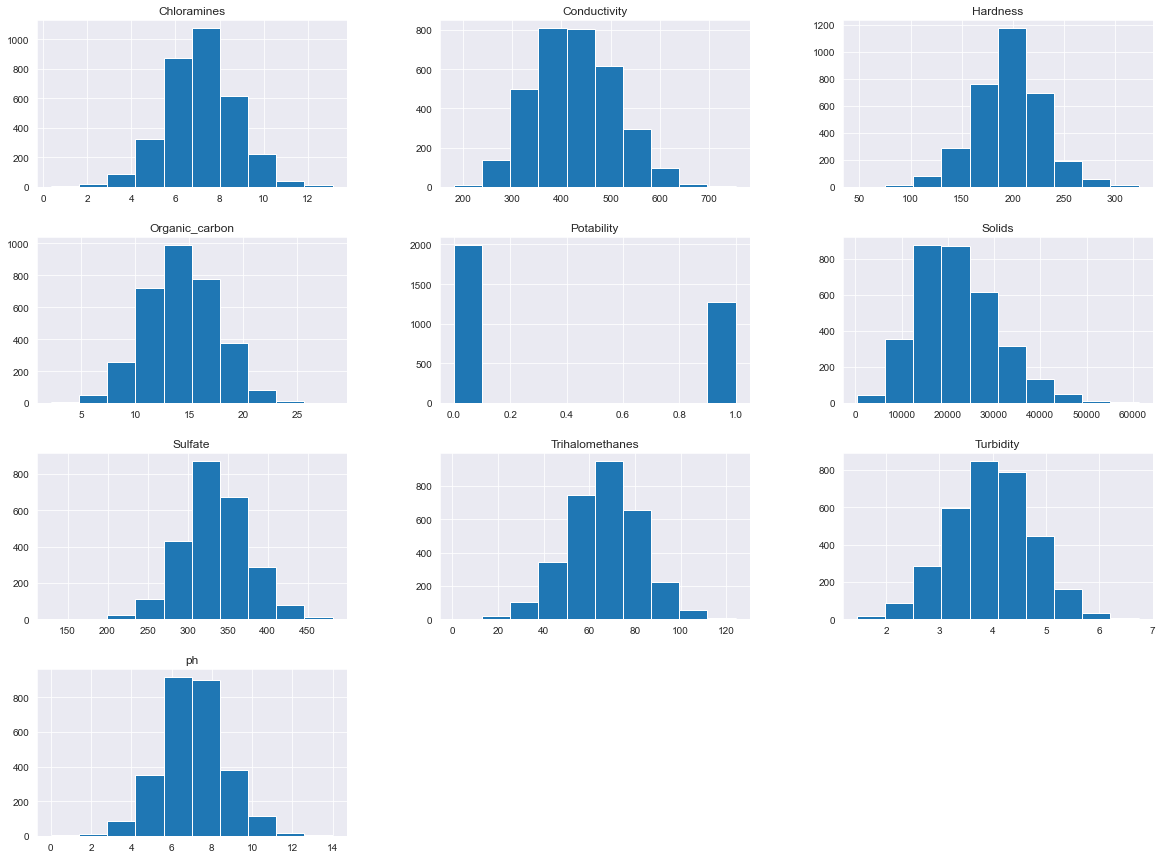

In [4]:
water.hist(figsize=(20,15))

Except for pH, Conductivity, Trihalomethanes and Turbidity, features are in either ppm or mg/L. While working with aqueous solutions, it is safe to say 1 ppm = 1 mg/L.

In [5]:
water.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

Skewnesses are low except for Solids and Potability. Reducing high skewnesses of features may influence models to work better, and skewness of Potability being high means that we're dealing with an imbalanced dataset.

Now I will reserve some part of the data as test set to use it in final evaluation 

In [6]:
from sklearn.model_selection import train_test_split
water_train, water_test = train_test_split(water, test_size=0.20, random_state=0)
water = water_train.copy()

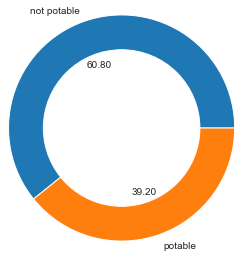

In [7]:
plt.pie(water.Potability.value_counts(), labels=['not potable','potable'], autopct='%.2f', radius=1.3)
white_circle = plt.Circle((0,0), 0.9, color='white')
plt.gcf().gca().add_artist(white_circle)

Class distribution is skewed

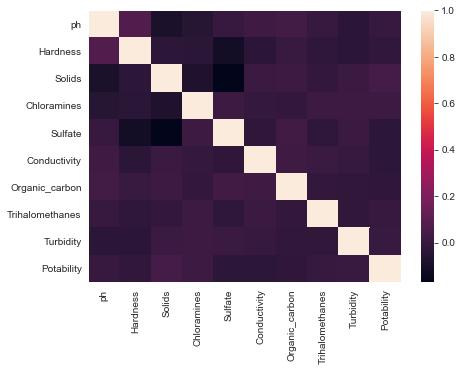

In [8]:
corr = water.corr()
plt.subplots(figsize=(7, 5))
sns.heatmap(corr)

Features have bad linear relationship with target, meaning that linear models won't help much to predict classes 

Now we will see how features distribute per class.

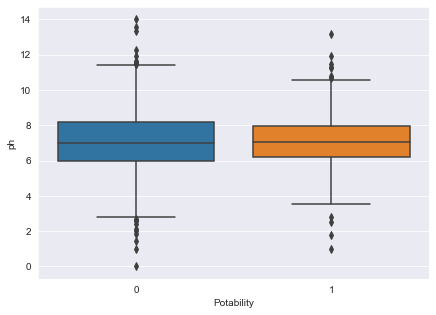

In [9]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='ph')

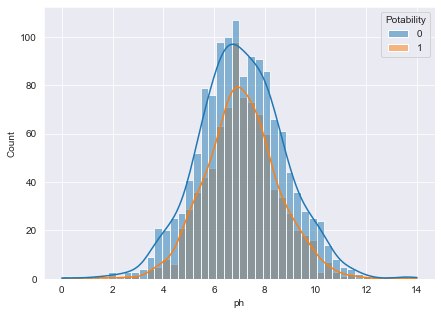

In [10]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='ph', hue='Potability', kde=True, alpha=0.5)

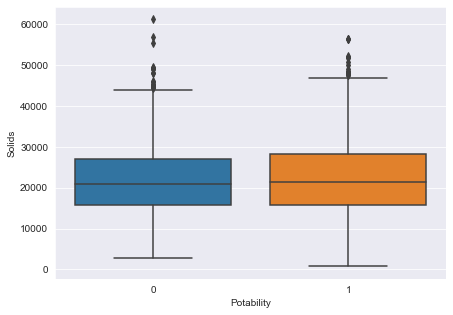

In [11]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Solids')

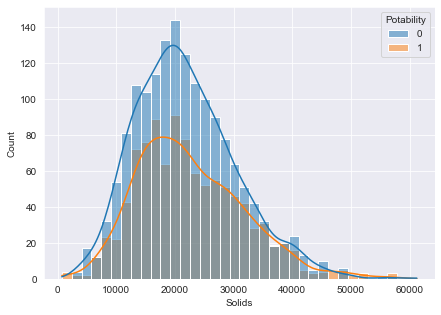

In [12]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Solids', hue='Potability', kde=True, alpha=0.5)

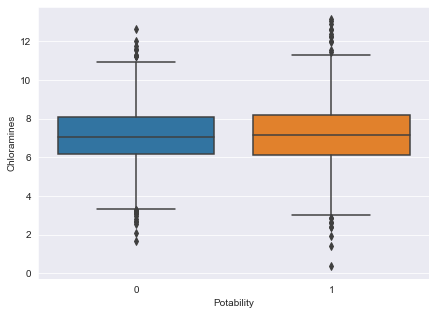

In [13]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Chloramines')

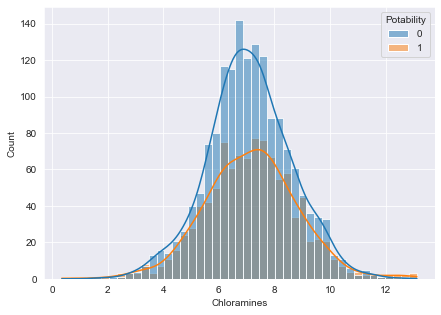

In [14]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Chloramines', hue='Potability', kde=True, alpha=0.5)

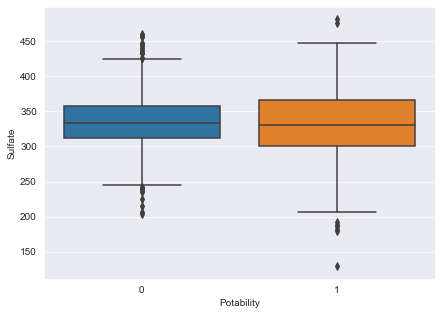

In [15]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Sulfate')

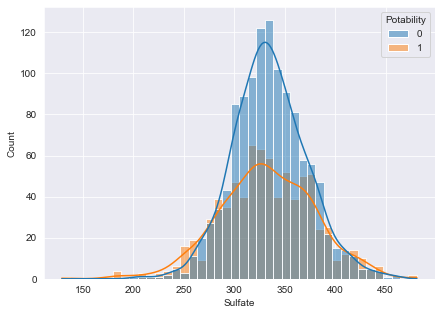

In [16]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Sulfate', hue='Potability', kde=True, alpha=0.5)

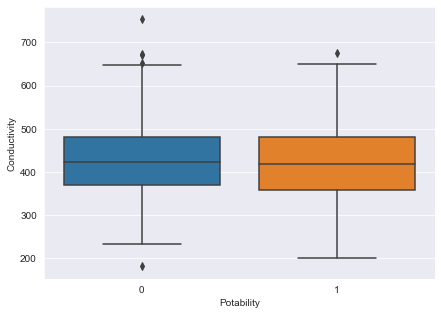

In [17]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Conductivity')

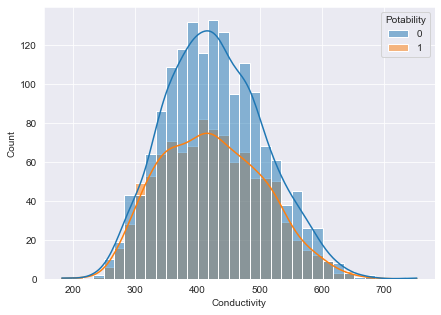

In [18]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Conductivity', hue='Potability', kde=True, alpha=0.5)

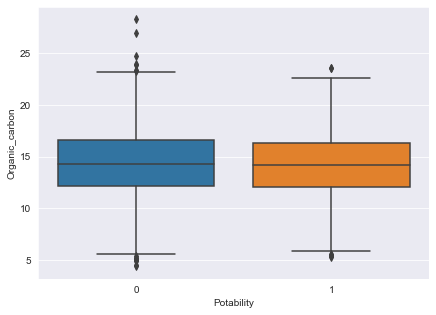

In [19]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Organic_carbon')

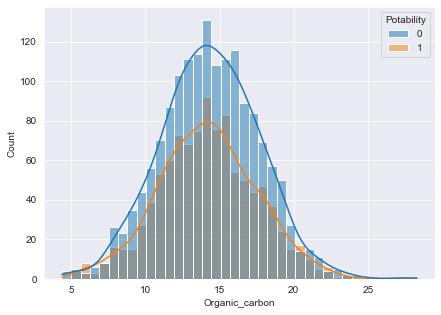

In [20]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Organic_carbon', hue='Potability', kde=True, alpha=0.5)

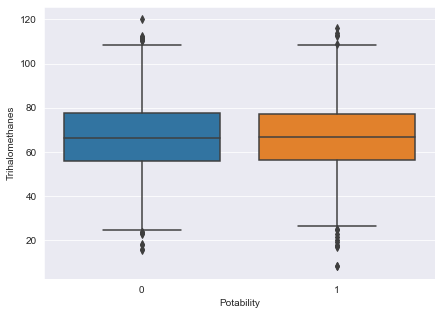

In [21]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Trihalomethanes')

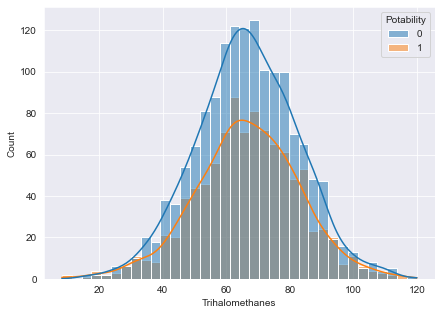

In [22]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Trihalomethanes', hue='Potability', kde=True, alpha=0.5)

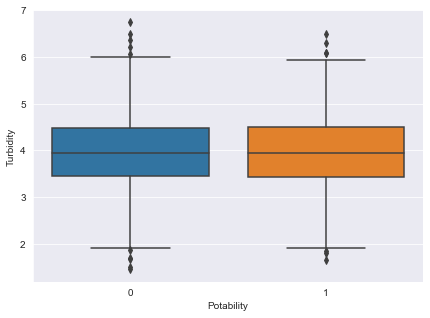

In [23]:
plt.subplots(figsize=(7, 5))
sns.boxplot(data=water, x='Potability', y='Turbidity')

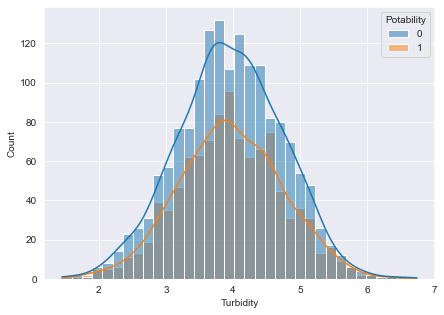

In [24]:
plt.subplots(figsize=(7, 5))
sns.histplot(data=water, x='Turbidity', hue='Potability', kde=True, alpha=0.5)

<h2>Building Models</h2>

In [25]:
X_train = water_train.drop('Potability', axis=1).to_numpy()
y_train = water_train.Potability.to_numpy()
X_test = water_test.drop('Potability', axis=1).to_numpy()
y_test = water_test.Potability.to_numpy()

Filling missing values:

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_fillna = imputer.fit_transform(X_train)
X_test_fillna = imputer.transform(X_test)

Before building powerful models, let's see an example to linear models that can't learn this data

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_fillna, y_train)
pred_logreg = logreg.predict(X_test_fillna)

In [28]:
from sklearn.metrics import classification_report, f1_score
cr_logreg = classification_report(y_test, pred_logreg, target_names=['not-potable','potable'], output_dict=True)
cr_logreg_dataframe = pd.DataFrame(cr_logreg).transpose()
cr_logreg_dataframe

C:\Users\tlgru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
not-potable,0.617378,1.000000,0.763431,405.000000
potable,0.000000,0.000000,0.000000,251.000000
accuracy,0.617378,0.617378,0.617378,0.617378
macro avg,0.308689,0.500000,0.381715,656.000000
weighted avg,0.381156,0.617378,0.471325,656.000000


In [29]:
pred_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h3>Random Forest</h3>

Random forest doesn't need scaling of the data. Filling missing values with it's feature's median

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe_rf = Pipeline([('imputer', imputer), ('rf', RandomForestClassifier())])
param_grid_rf = {'rf__max_features': ['auto','sqrt','log2'], 'rf__n_estimators': [100, 300, 1000, 3000]}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__n_estimators': [100, 300, 1000, 3000]})

Retrained model:

In [31]:
optimised_rf = grid_rf.best_estimator_

Final evaluation: Classification report for optimised random forest:

In [32]:
pred_optimised_rf = optimised_rf.predict(X_test)
cr_optimised_rf = classification_report(y_test, pred_optimised_rf, target_names = ['not potable','potable'], output_dict = True)
cr_optimised_rf_dataframe = pd.DataFrame(cr_optimised_rf).transpose()
cr_optimised_rf_dataframe

,precision,recall,f1-score,support
not potable,0.683810,0.886420,0.772043,405.000000
potable,0.648855,0.338645,0.445026,251.000000
accuracy,0.676829,0.676829,0.676829,0.676829
macro avg,0.666332,0.612533,0.608535,656.000000
weighted avg,0.670435,0.676829,0.646919,656.000000


In [33]:
from sklearn.metrics import roc_curve, auc
fpr, recall, thresholds = roc_curve(y_test, pred_optimised_rf)
auc(fpr, recall)

0.6125325857065564

In [34]:
importances = optimised_rf.named_steps['rf'].feature_importances_
importances_df = pd.DataFrame({'feature':water.columns.drop('Potability'), 'importance':importances})

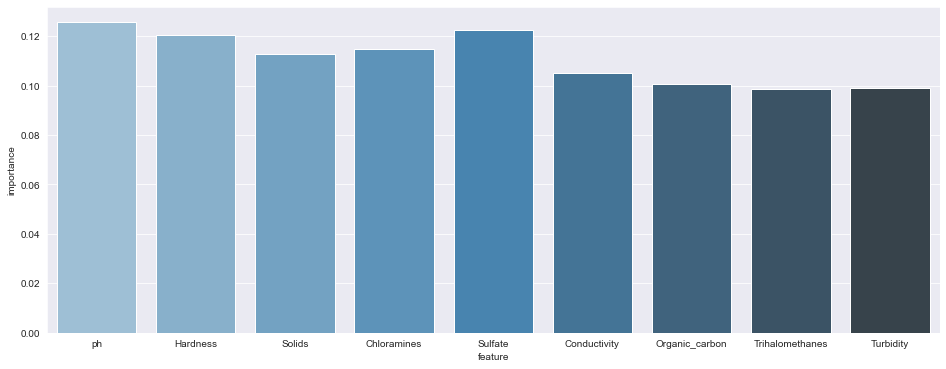

In [35]:
plt.subplots(figsize=(16, 6))
sns.barplot(data=importances_df, x='feature', y='importance', palette='Blues_d')

<h3>Support Vector Machine</h3>

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler

We will handle preprocessing with a pipeline

In [37]:
pipe_svm = Pipeline([('imputer', imputer), ('scaler', MinMaxScaler()), ('svm', SVC())])
param_grid_svm = {'scaler':[MinMaxScaler(),StandardScaler()], 'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [38]:
grid_svm = GridSearchCV(pipe_svm, param_grid_svm)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'scaler': [MinMaxScaler(), StandardScaler()],
                         'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Now, extracting retrained model and evaluating model with test set

In [39]:
grid_svm.best_params_

{'scaler': StandardScaler(), 'svm__C': 1, 'svm__gamma': 0.1}

optimised_svm below is a pipeline, thus it'll scale X_test and then fit the estimator

In [40]:
optimised_svm = grid_svm.best_estimator_
pred_optimised_svm = optimised_svm.predict(X_test)
cr_optimised_svm = classification_report(y_test, pred_optimised_svm, target_names = ['not potable','potable'],
                                         output_dict = True)
cr_optimised_svm_dataframe = pd.DataFrame(cr_optimised_svm).transpose()
cr_optimised_svm_dataframe

,precision,recall,f1-score,support
not potable,0.691176,0.928395,0.792413,405.000000
potable,0.741071,0.330677,0.457300,251.000000
accuracy,0.699695,0.699695,0.699695,0.699695
macro avg,0.716124,0.629536,0.624857,656.000000
weighted avg,0.710267,0.699695,0.664192,656.000000


In [41]:
from sklearn.metrics import roc_curve, auc
fpr_svm, recall_svm, thresholds_svm = roc_curve(y_test, pred_optimised_svm)
auc(fpr_svm, recall_svm)

0.6295361762825241

<h3>Multilayer Perceptron</h3>

In [116]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_fillna = imputer.fit_transform(X_train)
X_test_fillna = imputer.transform(X_test)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train_fillna_scaled = scaler.fit_transform(X_train_fillna)
X_test_fillna_scaled = scaler.transform(X_test_fillna) 

In [117]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(9,)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [118]:
optimizer = keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

In [119]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('water_mlp.h5', save_best_only=True)
history = model.fit(X_train_fillna_scaled, y_train, epochs=30, validation_split=0.1, callbacks=checkpoint_cb)
history

Epoch 1/30
74/74 [==============================] - 1s 3ms/step - loss: 0.6707 - auc: 0.5108 - val_loss: 0.6673 - val_auc: 0.5371
Epoch 2/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6677 - auc: 0.5340 - val_loss: 0.6656 - val_auc: 0.5487
Epoch 3/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6653 - auc: 0.5448 - val_loss: 0.6627 - val_auc: 0.5560
Epoch 4/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6646 - auc: 0.5572 - val_loss: 0.6624 - val_auc: 0.5533
Epoch 5/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6612 - auc: 0.5736 - val_loss: 0.6565 - val_auc: 0.5798
Epoch 6/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6574 - auc: 0.5795 - val_loss: 0.6563 - val_auc: 0.6195
Epoch 7/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6525 - auc: 0.5964 - val_loss: 0.6510 - val_auc: 0.6217
Epoch 8/30
74/74 [==============================] - 0s 1ms/step - loss: 0.6472 - auc: 0.61